In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
bitcoin = pd.read_csv('BTC-EUR.csv')
bitcoin.head

<bound method NDFrame.head of             Date          Open          High           Low         Close  \
0     2014-09-17    359.546204    361.468506    351.586884    355.957367   
1     2014-09-18    355.588409    355.505402    319.789459    328.539368   
2     2014-09-19    328.278503    330.936707    298.921021    307.761139   
3     2014-09-20    307.665253    329.978180    303.931244    318.758972   
4     2014-09-21    318.120514    321.504517    306.502197    310.632446   
...          ...           ...           ...           ...           ...   
3285  2023-09-15  24437.279297  25165.308594  24351.880859  24954.433594   
3286  2023-09-16  24948.927734  25153.759766  24606.507813  24936.523438   
3287  2023-09-17  24934.185547  25073.419922  24810.191406  24898.650391   
3288  2023-09-18  24898.318359  24938.402344  24783.187500  24872.564453   
3289  2023-09-19  25040.650391  25596.652344  24946.126953  25403.964844   

         Adj Close       Volume  
0       355.957367     

<Axes: >

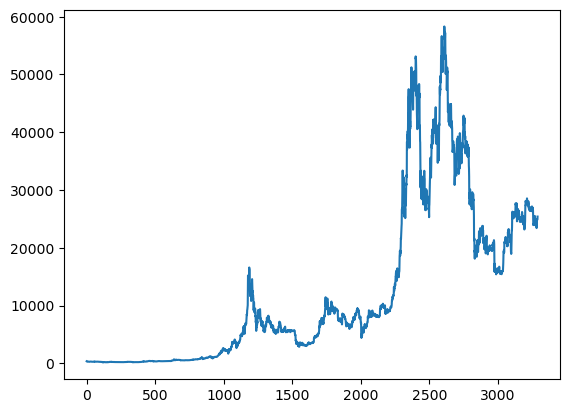

In [3]:
bitcoin["Close"].plot()


On a pas de dates en abscisse
Pour l'instant il utilise l'index par défaut

In [4]:
# index par défaut 0, 1, 2 ...
bitcoin.index


RangeIndex(start=0, stop=3290, step=1)

On va définir un DateTimeIndex

In [5]:
bitcoin = pd.read_csv("BTC-EUR.csv", index_col="Date")
bitcoin.head() # comparer avec ci-dessus. 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


<Axes: xlabel='Date'>

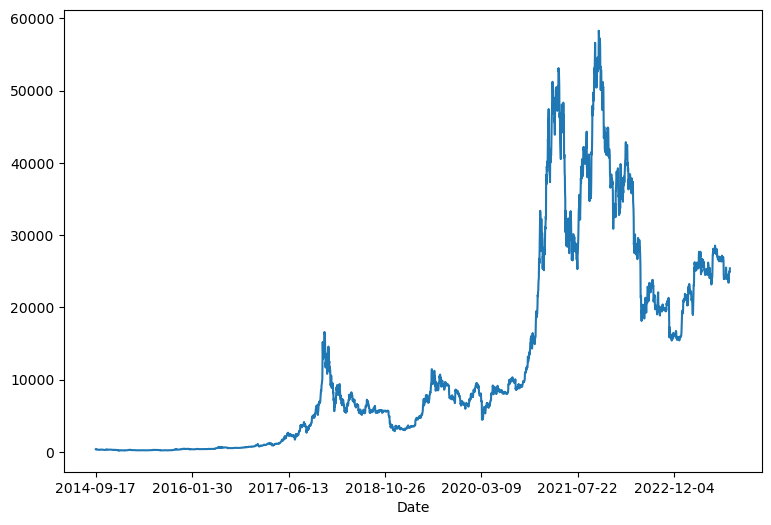

In [6]:
# joue aussi sur les graphes
bitcoin["Close"].plot(figsize=(9, 6))

Faut indiquer  qu'il faut utiliser cet index comme une date

In [7]:
bitcoin = pd.read_csv("BTC-EUR.csv", index_col="Date", parse_dates=True)
bitcoin.head() # comparer avec ci-dessus. 


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


<Axes: xlabel='Date'>

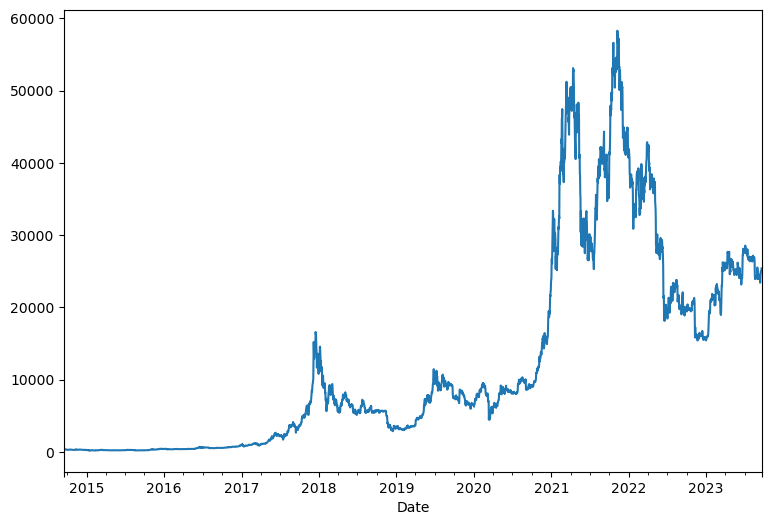

In [8]:
bitcoin["Close"].plot(figsize=(9, 6))

In [9]:
# le type de l'index est datetime64
bitcoin.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-09-10', '2023-09-11', '2023-09-12', '2023-09-13',
               '2023-09-14', '2023-09-15', '2023-09-16', '2023-09-17',
               '2023-09-18', '2023-09-19'],
              dtype='datetime64[ns]', name='Date', length=3290, freq=None)

Maintenant on peut faire de l'indexing et du slicing sur les dates de l'index

<Axes: xlabel='Date'>

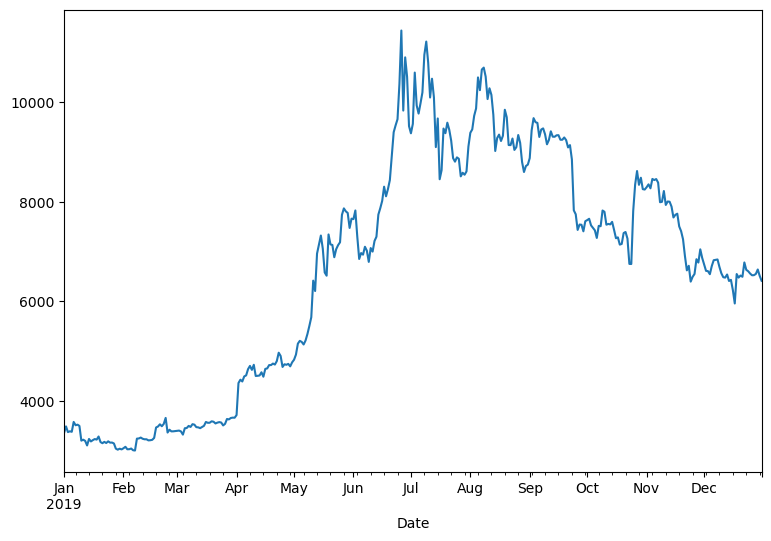

In [10]:
bitcoin["2019":"2019"]["Close"].plot(figsize=(9, 6))

<Axes: xlabel='Date'>

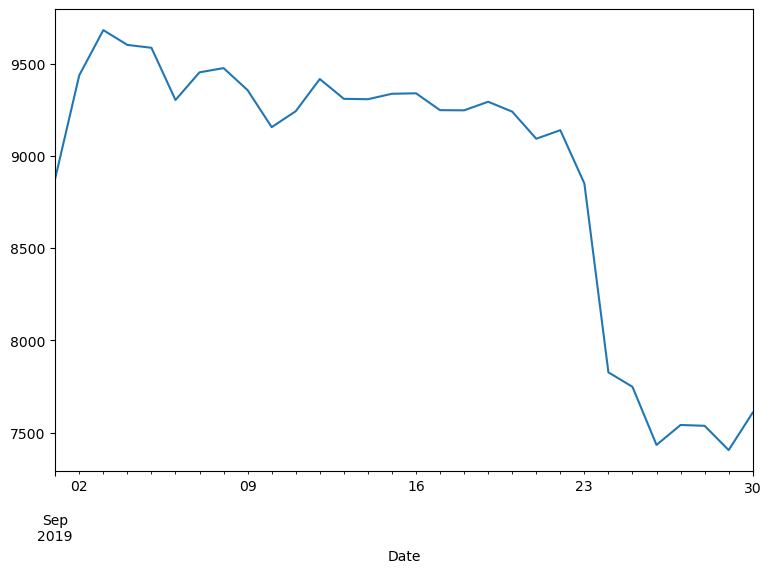

In [11]:
bitcoin["2019-09":"2019-09"]["Close"].plot(figsize=(9, 6))

<Axes: xlabel='Date'>

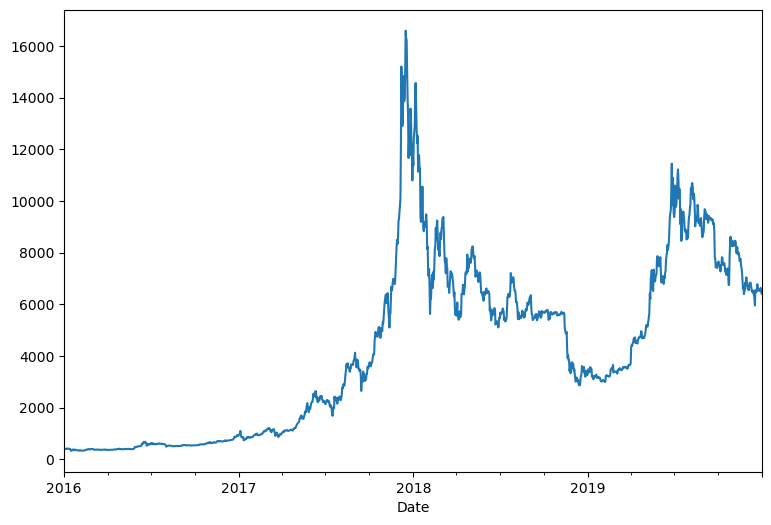

In [12]:
bitcoin["2016":"2019"]["Close"].plot(figsize=(9, 6))

<Axes: xlabel='Date'>

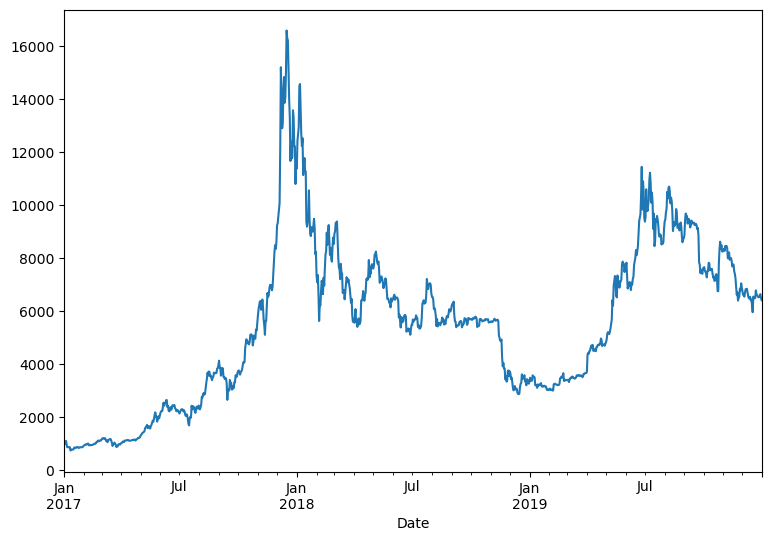

In [13]:
# On peut utiliser la fonction loc (accès à des colonnes via leur label)
bitcoin.loc["2017":"2019", "Close"].plot(figsize=(9, 6))

In [14]:
# conversion 
print(pd.to_datetime("25/02/1964"))
print(pd.to_datetime("25 feb 1964"))

# datetime comprend heure, min, sec, milisec ...

1964-02-25 00:00:00
1964-02-25 00:00:00


C:\Users\phili\AppData\Local\Temp\ipykernel_11096\1296315247.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  print(pd.to_datetime("25/02/1964"))


<Axes: xlabel='Date'>

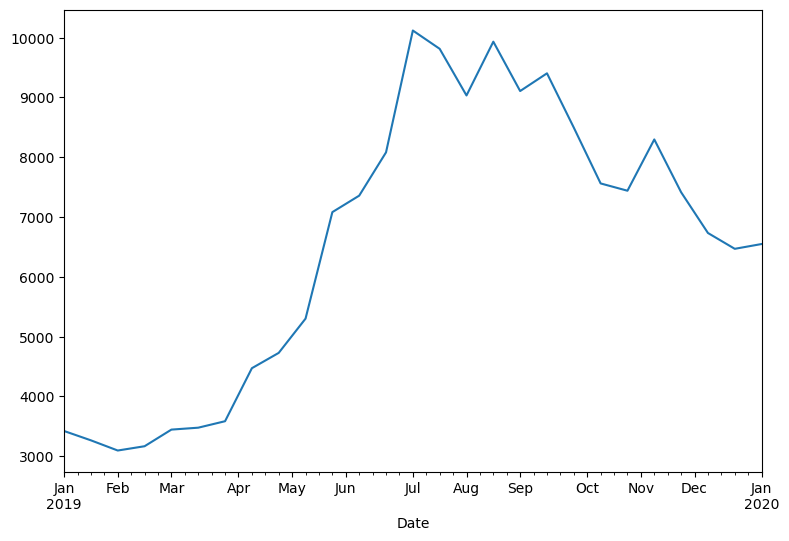

In [15]:
# resample
# regrouper les données par frequence
# jour, mois, an, min...

# ne marche pas
# bitcoin.loc["2019":"2019", "Close"].resample("M").plot()

# une fois les données regroupées par mois on peut appliquer un calcul de moyenne par exemple
# M month, W week, 2W toutes les 2 semaines ...
bitcoin["2019":"2019"]["Close"].resample("2W").mean().plot(figsize=(9, 6))



<Axes: xlabel='Date'>

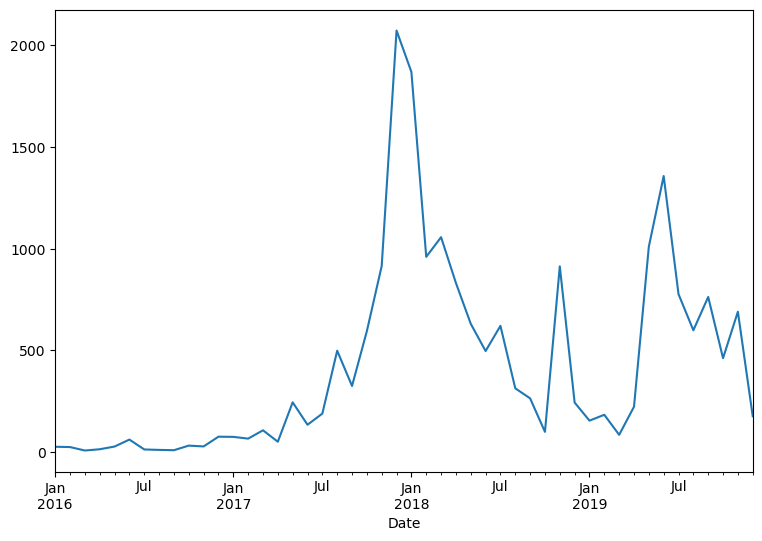

In [16]:
# volatilité sur 2016 2019 par mois
bitcoin["2016":"2019"]["Close"].resample("M").std().plot(figsize=(9, 6))

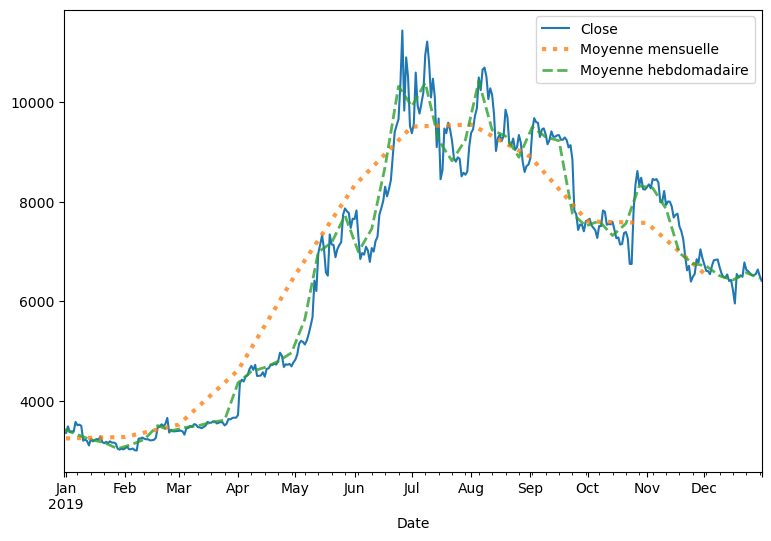

In [17]:
plt.figure(figsize=(9, 6))
bitcoin["2019":"2019"]["Close"].plot()
bitcoin["2019":"2019"]["Close"].resample("M").mean().plot(label="Moyenne mensuelle", lw=3, ls=":", alpha=.8)
bitcoin["2019":"2019"]["Close"].resample("W").mean().plot(label="Moyenne hebdomadaire", lw=2, ls="--", alpha=.8)
plt.legend()

In [18]:
bitcoin["2019":"2019"]["Close"].resample("M").agg(["mean", "std", "min", "max"])

,mean,std,min,max
Date,,,,
2019-01-31,3241.492786,154.675614,3015.454102,3572.601807
2019-02-28,3270.404367,183.437120,2998.157227,3653.833008
2019-03-31,3518.958685,84.929107,3317.817383,3659.444824
2019-04-30,4609.844377,222.918594,3710.858154,4964.707031
2019-05-31,6532.714403,1010.175947,4823.619629,7866.871094
2019-06-30,8327.527637,1357.107430,6791.208984,11443.038086
2019-07-31,9511.153604,776.404643,8452.749023,11221.008789
2019-08-31,9552.757151,598.797179,8598.343750,10697.322266
2019-09-30,8902.757308,762.564631,7405.604980,9681.073242


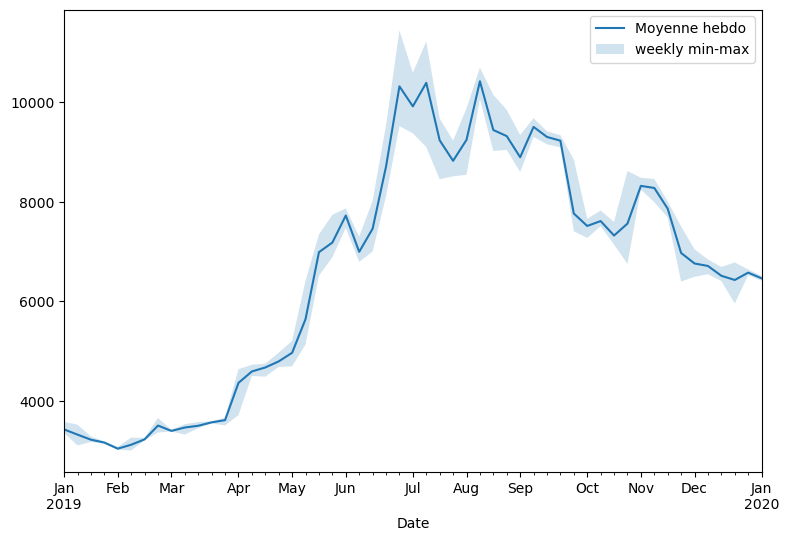

In [19]:
m = bitcoin["2019":"2019"]["Close"].resample("W").agg(["mean", "std", "min", "max"])
plt.figure(figsize=(9, 6))
#m["mean"]["2019"].plot(label="Moyenne hebdo")
m["mean"].plot(label="Moyenne hebdo")
plt.fill_between(m.index, m["max"], m["min"], alpha=0.2, label="weekly min-max")
plt.legend()

<Axes: xlabel='Date'>

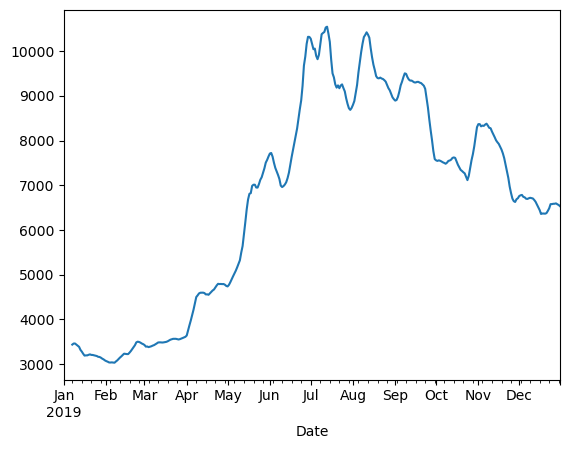

In [20]:
# Moyenne glissante
bitcoin["2019":"2019"]["Close"].rolling(window=7).mean().plot()

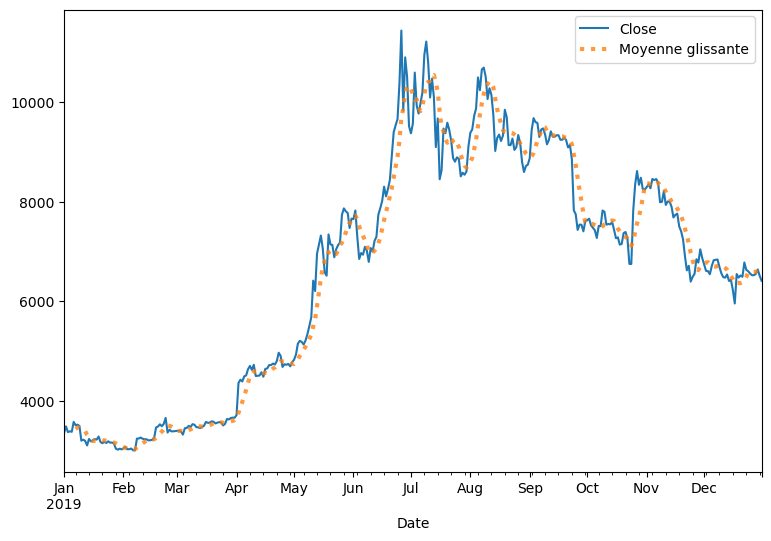

In [21]:
plt.figure(figsize=(9, 6))
bitcoin["2019":"2019"]["Close"].plot()
bitcoin["2019":"2019"]["Close"].rolling(window=7).mean().plot(label="Moyenne glissante", lw=3, ls=":", alpha=.8)
plt.legend()

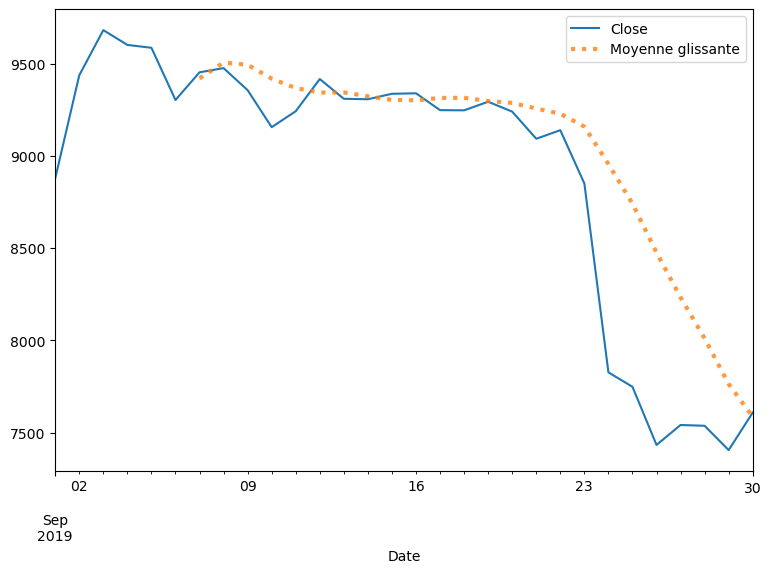

In [22]:
# Que Septembre
# Moyenne glissante décallé à la fin des 7 jours
plt.figure(figsize=(9, 6))
bitcoin["2019-09":"2019-09"]["Close"].plot()
bitcoin["2019-09":"2019-09"]["Close"].rolling(window=7).mean().plot(label="Moyenne glissante", lw=3, ls=":", alpha=.8)
plt.legend()

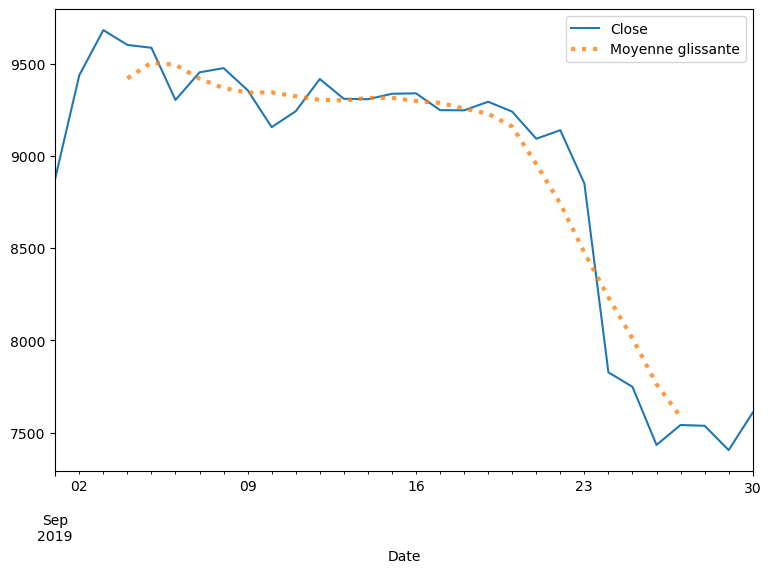

In [23]:
# Que Septembre
# Moyenne glissante centrée sur les 7 jours
plt.figure(figsize=(9, 6))
bitcoin["2019-09":"2019-09"]["Close"].plot()
bitcoin["2019-09":"2019-09"]["Close"].rolling(window=7, center=True).mean().plot(label="Moyenne glissante", lw=3, ls=":", alpha=.8)
plt.legend()

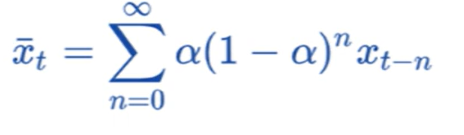

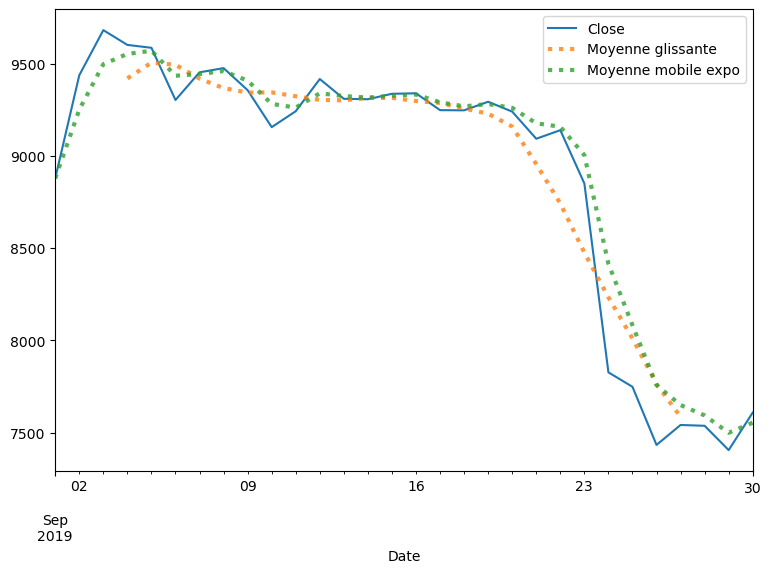

In [24]:
# C'est bien mais c'est pas top => Moyenne mobile exponentielle
plt.figure(figsize=(9, 6))
bitcoin["2019-09":"2019-09"]["Close"].plot()
bitcoin["2019-09":"2019-09"]["Close"].rolling(window=7, center=True).mean().plot(label="Moyenne glissante", lw=3, ls=":", alpha=.8)
bitcoin["2019-09":"2019-09"]["Close"].ewm(alpha = 0.5).mean().plot(label="Moyenne mobile expo", lw=3, ls=":", alpha=.8)
plt.legend()

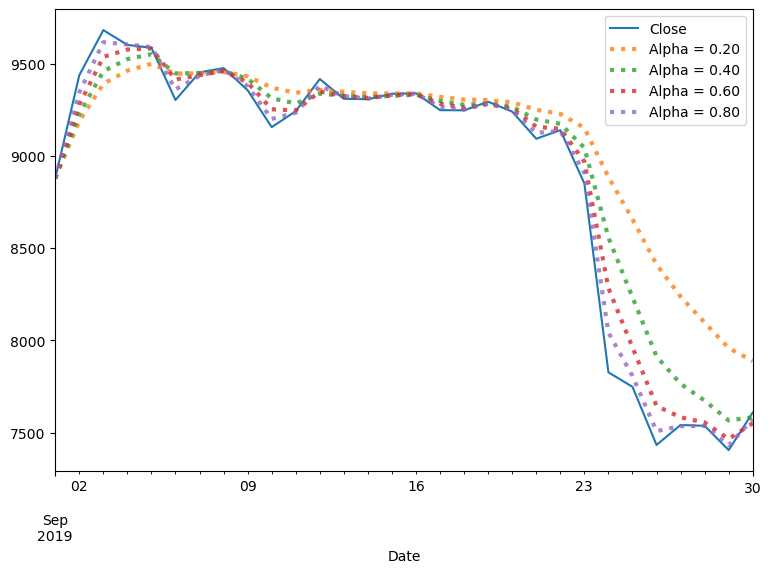

In [25]:
plt.figure(figsize=(9, 6))
bitcoin["2019-09":"2019-09"]["Close"].plot()
for alpha in np.arange(0.2, 1, 0.2):
  bitcoin["2019-09":"2019-09"]["Close"].ewm(alpha = alpha).mean().plot(label=f"Alpha = {alpha:.2f}", lw=3, ls=":", alpha=.8)

plt.legend()

# Assembler des datasets
* Aller sur Yahoo Finance
* Chercher ETH-EUR
* Récupérer le fichier
* Z! les données ne commencent qu'en 2015 on peut avoir un soucis

In [26]:
eth = pd.read_csv("ETH-EUR.csv", index_col="Date", parse_dates=True)
eth.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-11,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,286.677399,289.079956,279.644714,282.937531,282.937531,613364441


<Axes: xlabel='Date'>

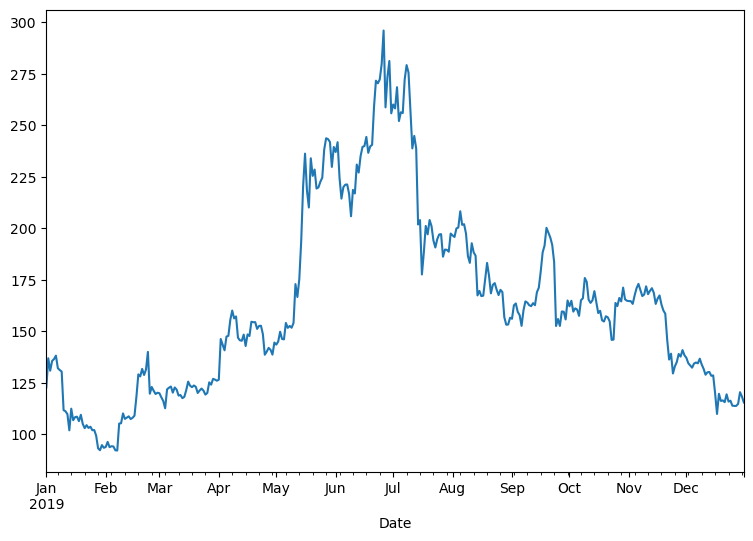

In [27]:
eth["2019":"2019"]["Close"].plot(figsize=(9, 6))

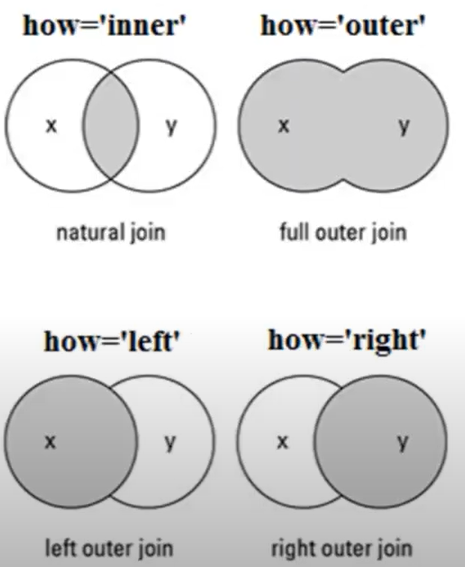

1. Inner : assemblage seulement sur les index en commun
1. Outer : assemblage sur tous les index (y aura des NaN)
1. Left : assemblage sur les index qui sont dans le 1er dataset
1. Right : assemblage sur les index qui sont dans le 2eme dataset

In [28]:
#pd.merge(bitcoin, eth, on="Date", how="inner")
pd.merge(bitcoin, eth, on="Date", how="inner", suffixes=("_btc", "_eth"))

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2017-11-11,5674.877930,5893.123535,5319.574707,5451.084473,5451.084473,4208762919,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,5397.796387,5680.399414,4732.066895,5102.976074,5102.976074,7682118257,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,5092.838867,5835.995117,5016.558105,5624.187988,5624.187988,5370187705,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,5625.894043,5796.897949,5494.685547,5628.764160,5628.764160,2711943351,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,5627.924316,6227.523438,5626.492188,6209.081543,6209.081543,3565506814,286.677399,289.079956,279.644714,282.937531,282.937531,613364441
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-15,24437.279297,25165.308594,24351.880859,24954.433594,24954.433594,12986392832,1498.227173,1538.326416,1498.083008,1529.793579,1529.793579,5208111020
2023-09-16,24948.927734,25153.759766,24606.507813,24936.523438,24936.523438,10758314752,1529.695557,1548.289429,1511.743042,1538.474731,1538.474731,4075306658
2023-09-17,24934.185547,25073.419922,24810.191406,24898.650391,24898.650391,6936865556,1538.293091,1546.298462,1529.981812,1532.459473,1532.459473,2642385318


In [29]:
btc_eth = pd.merge(bitcoin, eth, on="Date", how="inner", suffixes=("_btc", "_eth"))

<Axes: xlabel='Date'>

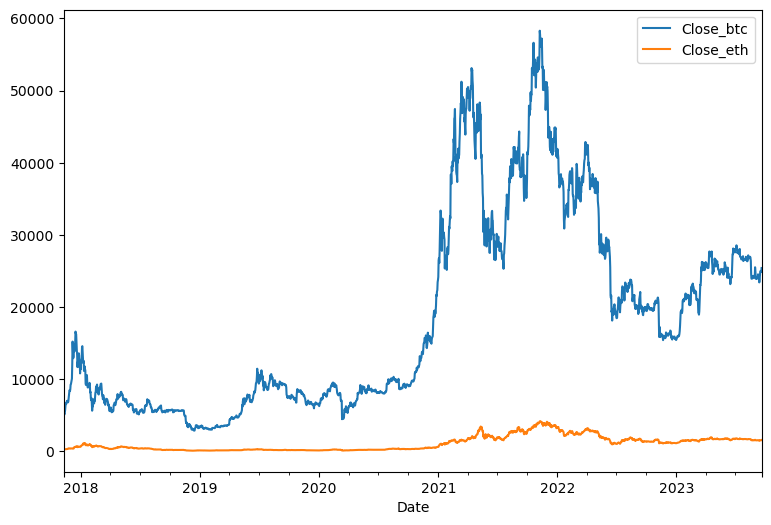

In [30]:
btc_eth[["Close_btc","Close_eth"]].plot(figsize=(9, 6)) # Attention à la syntaxe

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

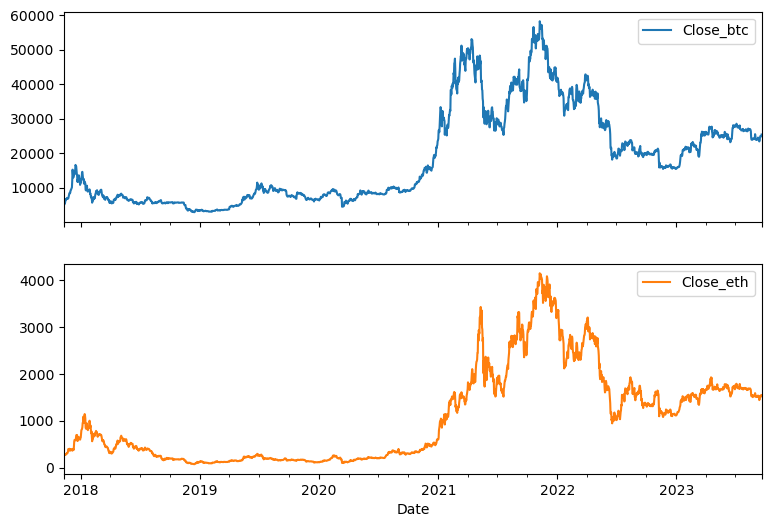

In [31]:
btc_eth[["Close_btc","Close_eth"]].plot(figsize=(9, 6), subplots=True) # Attention à la syntaxe

In [32]:
# Calculer la correlection eth btc
btc_eth[["Close_btc","Close_eth"]].corr()



,Close_btc,Close_eth
Close_btc,1.000000,0.929066
Close_eth,0.929066,1.000000


La corrélation est de 93%

<Axes: >

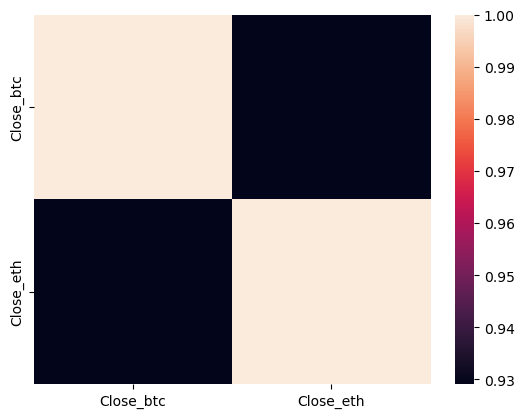

In [33]:
import seaborn as sns
correlations = btc_eth[["Close_btc","Close_eth"]].corr()
sns.heatmap(correlations)

# Exo - Trading strategy
On va mettre en oeuvre la strategie de la tortue

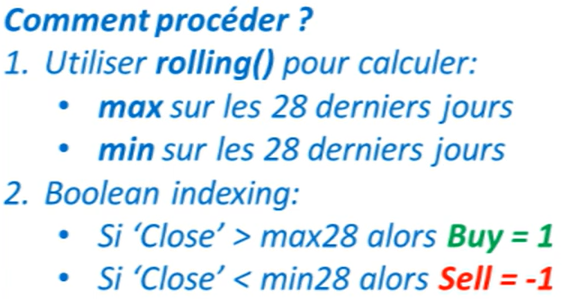

Par exemple : On achète si la valeur de closing est sup au max des 28 derniers jours

In [39]:
data = bitcoin.copy()
data["Buy"] = np.zeros(len(data))
data["Sell"] = np.zeros(len(data))
data.head()


,Open,High,Low,Close,Adj Close,Volume,Buy,Sell
Date,,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166,0.0,0.0
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849,0.0,0.0
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103,0.0,0.0
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826,0.0,0.0
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625,0.0,0.0


In [45]:
# pas oublier le shift(1) qui décale le signal de 1 jour vers la droite
# sinon, forcément il est entre le min et la max du jour

data["RollingMax"] = data["Close"].shift(1).rolling(window=28).max()
data["RollingMin"] = data["Close"].shift(1).rolling(window=28).min()

# boolean indexing
# Ecrit 1 dans la colonne Buy si le rolling max est inf au close
data.loc[data["RollingMax"] < data["Close"], "Buy"] = 1
data.loc[data["RollingMin"] > data["Close"], "Sell"] = -1

# Il aime pas la notation si dessous (mais ça  marche)
# data[data["RollingMax"] < data["Close"]]["Buy"] = 1
# data[data["RollingMin"] > data["Close"]]["Sell"] = -1

data.head()

,Open,High,Low,Close,Adj Close,Volume,Buy,Sell,RollingMax,RollingMin
Date,,,,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166,0.0,0.0,NaN,NaN
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849,0.0,0.0,NaN,NaN
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103,0.0,0.0,NaN,NaN
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826,0.0,0.0,NaN,NaN
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625,0.0,0.0,NaN,NaN


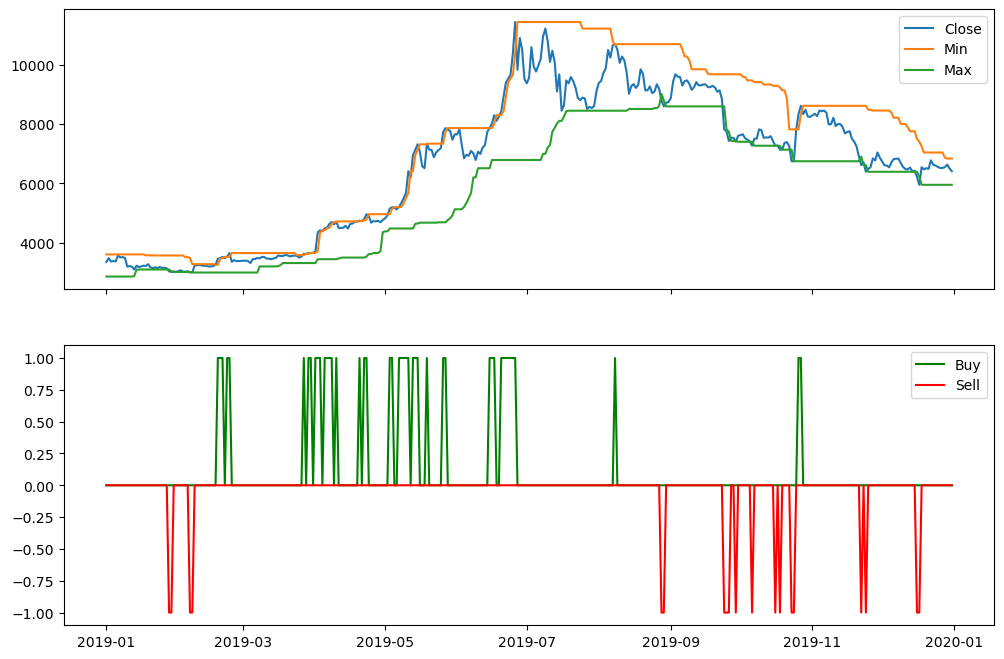

In [46]:
start = "2019"
end = "2019"

fig, ax = plt.subplots(2, figsize=(12,8), sharex=True)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].legend(["Close", "Min", "Max"])

ax[1].plot(data["Buy"][start:end], c="g")
ax[1].plot(data["Sell"][start:end], c="r")
ax[1].legend(["Buy", "Sell"])